In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [3]:
application_df = pd.read_csv('/content/drive/MyDrive/Credit card approval/application_record.csv')
credit_df = pd.read_csv('/content/drive/MyDrive/Credit card approval/credit_record.csv')


In [4]:
application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
# Creating a new DataFrame 'credit_month_df' by grouping 'credit_df' based on the 'ID' column
# and aggregating the 'MONTHS_BALANCE' column using the 'min' function (earliest month for each ID)
credit_month_df = pd.DataFrame(credit_df.groupby(['ID'])['MONTHS_BALANCE'].agg(min))

# Renaming the column 'MONTHS_BALANCE' to 'MONTHS_BEGINNING' in 'credit_month_df'
credit_month_df = credit_month_df.rename(columns={'MONTHS_BALANCE': 'MONTHS_BEGINNING'})

# Multiplying the 'MONTHS_BEGINNING' column by -1 to convert the values to positive integers
# (since the original data was representing months in a reversed order)
credit_month_df = credit_month_df['MONTHS_BEGINNING'] * -1

In [7]:
print(application_df.shape)
print(credit_df.shape)

(438557, 18)
(1048575, 3)


In [8]:
print("number of unique id in application_df : ",application_df.ID.nunique())
print("number of unique id in credit_df : ",credit_df.ID.nunique())
print("number of common id in both dataframe : ",len(set(application_df['ID']).intersection(set(credit_df['ID']))))

number of unique id in application_df :  438510
number of unique id in credit_df :  45985
number of common id in both dataframe :  36457


In [9]:
credit_df.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [10]:
credit_df['STATUS'].replace({'C': 0, 'X': 0}, inplace=True)
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

# converting any late payment status to 1 and all others to 0.
credit_df['STATUS'] = credit_df['STATUS'].apply(lambda x: 1 if x >= 2 else 0)

In [11]:
credit_target_df = pd.DataFrame(credit_df.groupby(['ID'])['STATUS'].agg(max))

# Rename the 'STATUS' column in 'credit_target_df' to 'TARGET'.
credit_target_df = credit_target_df.rename(columns={'STATUS' : 'TARGET'})

In [12]:
print(credit_month_df.shape)
print(credit_target_df.shape)

(45985,)
(45985, 1)


In [13]:
data = application_df.merge(credit_month_df , on='ID' , how='inner')
data = data.merge(credit_target_df , on='ID' , how='inner')
data.shape

(36457, 20)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [15]:
data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BEGINNING           0
TARGET                     0
dtype: int64

In [16]:
data.AMT_INCOME_TOTAL = data['AMT_INCOME_TOTAL'].astype('int')
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].astype('int')

In [17]:
object_col = data.select_dtypes(['object']).columns
int_col = data.select_dtypes(['int']).columns
int_col

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BEGINNING', 'TARGET'],
      dtype='object')

In [18]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

In [19]:
# handling missing values

# adding XNA label for missing values

data['OCCUPATION_TYPE'].fillna('XNA' , inplace = True)

In [20]:
data.TARGET.value_counts(normalize=True)

0    0.983103
1    0.016897
Name: TARGET, dtype: float64

In [21]:
data['TARGET'][data['OCCUPATION_TYPE'] == 'XNA'].value_counts(normalize = True)
# the distribution matches with the total distribution . so, no bias induced in the model

0    0.982867
1    0.017133
Name: TARGET, dtype: float64

In [22]:
# handeling categorical variables

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in object_col:
    column_name = col + '_ENCODED'
    data[column_name] = label_encoder.fit_transform(data[col])

In [23]:
data[['ID' , 'CODE_GENDER' , 'CODE_GENDER_ENCODED']].sample(10)

,ID,CODE_GENDER,CODE_GENDER_ENCODED
36131,5022053,M,1
27625,5114384,F,0
22839,5092434,F,0
6491,5029470,F,0
32409,5137076,M,1
12681,5052910,F,0
34488,5146031,F,0
9060,5041108,F,0
21759,5091093,F,0
10254,5045193,F,0


In [24]:
data.set_index('ID', inplace=True)
data.drop(columns=object_col , axis = 1 , inplace = True)

In [25]:
data.head()


,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BEGINNING,TARGET,CODE_GENDER_ENCODED,FLAG_OWN_CAR_ENCODED,FLAG_OWN_REALTY_ENCODED,NAME_INCOME_TYPE_ENCODED,NAME_EDUCATION_TYPE_ENCODED,NAME_FAMILY_STATUS_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED
ID,,,,,,,,,,,,,,,,,,,
5008804,0,427500,-12005,-4542,1,1,0,0,2,15,0,1,1,1,4,1,0,4,18
5008805,0,427500,-12005,-4542,1,1,0,0,2,14,0,1,1,1,4,1,0,4,18
5008806,0,112500,-21474,-1134,1,0,0,0,2,29,0,1,1,1,4,4,1,1,16
5008808,0,270000,-19110,-3051,1,0,1,1,1,4,0,0,0,1,0,4,3,1,14
5008809,0,270000,-19110,-3051,1,0,1,1,1,26,0,0,0,1,0,4,3,1,14


In [26]:
# Importing the 'train_test_split' function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Extracting features (X) from 'data' DataFrame by dropping the 'TARGET' column
X = data.drop('TARGET', axis=1)

# Extracting the target variable (y) from 'data' DataFrame
y = data['TARGET']

# Splitting the data into training and testing sets, with 70% of the data for training and 30% for testing
# The 'random_state' parameter is set to 42 to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
print(X_train.shape)
print(y_train.shape)

(25519, 18)
(25519,)


In [28]:
# Resampling the training data (X_train and y_train) using the 'SMOTE' technique to balance the classes
# The number of samples in the minority class will be increased by generating synthetic samples

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [29]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(50164, 18)
(50164,)


In [30]:
y_train_resampled.value_counts()

0    25082
1    25082
Name: TARGET, dtype: int64

In [31]:
y_train.value_counts()

0    25082
1      437
Name: TARGET, dtype: int64

In [32]:
# Importing the 'RandomForestClassifier' and 'RFE' (Recursive Feature Elimination) from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Setting the number of features to select using RFE to 12
n_features_to_select = 12
rf_classifier = RandomForestClassifier(random_state=42)

rfe = RFE(estimator=rf_classifier, n_features_to_select=n_features_to_select)

# Fitting the RFE to the resampled training data (X_train_resampled, y_train_resampled) to select the best features
rfe.fit(X_train_resampled, y_train_resampled)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=12)

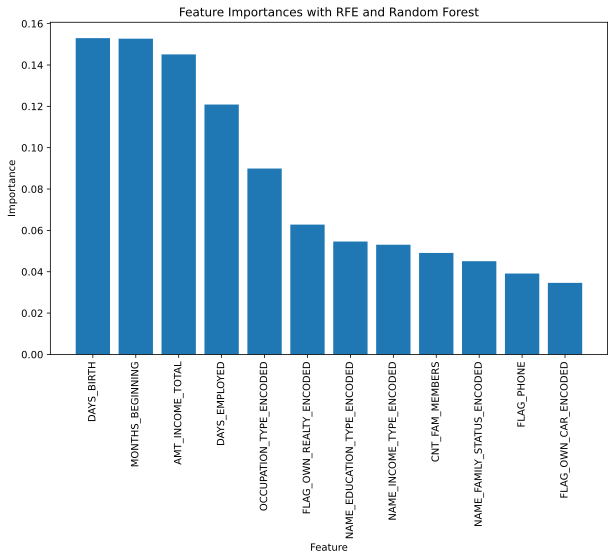

In [33]:
import matplotlib.pyplot as plt

# Getting the names of the selected features based on RFE support
selected_features = X_train.columns[rfe.support_]

# Getting the feature importances from the RandomForestClassifier
feature_importances = rfe.estimator_.feature_importances_

# Sorting the feature indices based on their importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorting the feature names and importances based on the sorted indices
sorted_features = selected_features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Creating a bar plot to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances with RFE and Random Forest")
plt.show()


In [34]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.0 MB/s eta 0:00:00


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV

In [36]:
# Importing necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import itertools

# Function to plot the ROC curve for a given model using the predicted probabilities
def plot_roc_curve(model, X, y):
    y_pred_prob = model.predict_proba(X)[:, 1]  # Getting predicted probabilities for positive class
    fpr, tpr, _ = roc_curve(y, y_pred_prob)  # Calculating ROC curve values
    auc_score = roc_auc_score(y, y_pred_prob)  # Calculating AUC (Area Under the Curve) score

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Random Guess line (diagonal)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Function to plot the precision-recall curve for a given model using the predicted probabilities
def plot_precision_recall_curve(model, X, y):
    y_pred_prob = model.predict_proba(X)[:, 1]  # Getting predicted probabilities for positive class
    precision, recall, _ = precision_recall_curve(y, y_pred_prob)  # Calculating precision-recall values
    avg_precision = average_precision_score(y, y_pred_prob)  # Calculating Average Precision score

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Precision-Recall Curve (Avg Precision = {:.2f})'.format(avg_precision))
    plt.xlabel('Recall (Sensitivity)')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix for a given model
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix

    print(cm)  # Print the confusion matrix

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [37]:
# Random Forest

X_train_selected = X_train_resampled[selected_features]


In [38]:

# Defining the hyperparameter search space as a dictionary
param_dist = {
    'n_estimators': randint(100, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# Creating an instance of the RandomForestClassifier with a random state of 42
rf_classifier = RandomForestClassifier(random_state=42)

# Creating an instance of RandomizedSearchCV with the defined hyperparameter search space and settings
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Performing the randomized search on the selected features and target variable
random_search.fit(X_train_selected, y_train_resampled)

# Retrieving the best estimator (Random Forest model) from the randomized search
best_rf_model = random_search.best_estimator_

# Printing the best hyperparameters found during the search
print("Best Hyperparameters:")
print(random_search.best_params_)


Best Hyperparameters:
{'max_depth': 73, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 406}


In [39]:
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=73, max_features='auto', min_samples_leaf=3,
                       min_samples_split=6, n_estimators=406, random_state=42)


In [40]:
from sklearn.model_selection import cross_val_score

# Retrieving the best estimator (Random Forest model) from the randomized search
best_rf_model = RandomForestClassifier(
      max_depth=73,
      max_features='auto',
      min_samples_leaf=3,
      min_samples_split=6,
      n_estimators=406,
      random_state=42)

# Performing cross-validation with 5-fold and scoring accuracy for the best Random Forest model
cv_scores = cross_val_score(best_rf_model, X_train_selected, y_train_resampled, cv=5, scoring='accuracy')

# Printing the cross-validation scores for each fold
print("Cross-Validation Scores:")
print(cv_scores)

# Printing the mean accuracy from the cross-validation
print("Mean Accuracy: {:.4f}".format(cv_scores.mean()))

# Printing the standard deviation of the accuracy from the cross-validation
print("Standard Deviation: {:.4f}".format(cv_scores.std()))

Cross-Validation Scores:
[0.97019835 0.98554769 0.98624539 0.98734177 0.98654306]
Mean Accuracy: 0.9832
Standard Deviation: 0.0065


In [41]:
# Fitting the best Random Forest model to the resampled training data (X_train_selected, y_train_resampled)
best_rf_model.fit(X_train_selected, y_train_resampled)

# Making predictions on the test data using the selected features (selected_features)
y_pred = best_rf_model.predict(X_test[selected_features])

# Calculating the predicted probabilities for the positive class (class 1) on the test data
y_pred_prob = best_rf_model.predict_proba(X_test[selected_features])[:, 1]


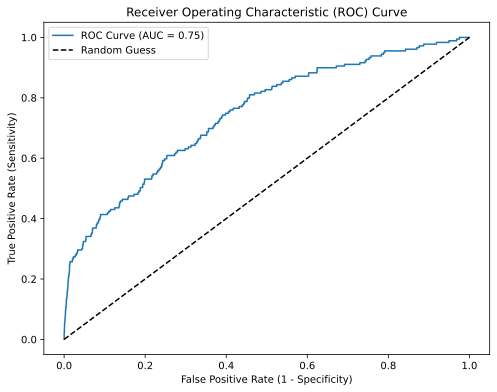

In [42]:
# Plot ROC curve
plot_roc_curve(best_rf_model, X_test[selected_features], y_test)

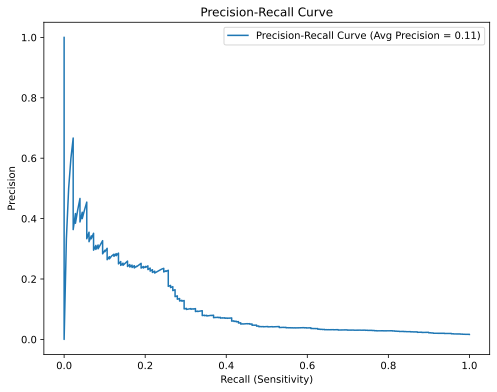

In [43]:
# Plot precision-recall curve
plot_precision_recall_curve(best_rf_model, X_test[selected_features], y_test)

[[0.98215448 0.01784552]
 [0.74301676 0.25698324]]


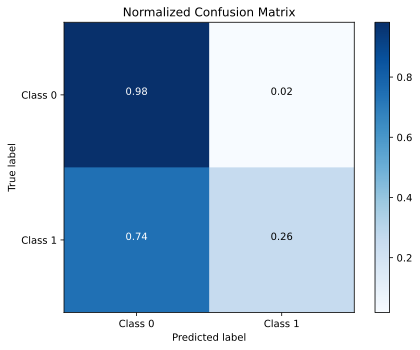

In [44]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1'], normalize=True, title='Normalized Confusion Matrix')

In [45]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10759
           1       0.19      0.26      0.22       179

    accuracy                           0.97     10938
   macro avg       0.59      0.62      0.60     10938
weighted avg       0.97      0.97      0.97     10938



In [46]:
custom_threshold = 0.067

# Apply thresholding to convert probabilities to binary class labels
y_pred_b = (y_pred_prob >= custom_threshold).astype(int)

[[0.65173343 0.34826657]
 [0.32402235 0.67597765]]


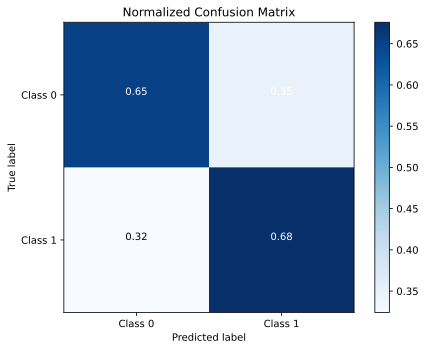

In [47]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_b)
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1'], normalize=True, title='Normalized Confusion Matrix')

In [48]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_b))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.65      0.79     10759
           1       0.03      0.68      0.06       179

    accuracy                           0.65     10938
   macro avg       0.51      0.66      0.42     10938
weighted avg       0.98      0.65      0.77     10938



In [50]:
#xgboost

import xgboost as xgb

best_xgboost_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    booster='gbtree',  # Tree-based models
    eval_metric='logloss',  # Logarithmic loss for binary classification
    use_label_encoder=False,  # Set to False to avoid warnings in newer versions of XGBoost
    verbosity=0,# Controls the level of verbosity (0 for silent)
    max_depth=12,
    n_estimators=250,
    min_child_weight=8,
    subsample=0.8,
    learning_rate =0.02,
    seed=42,
)

best_xgboost_model.fit(X_train_selected, y_train_resampled)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=8, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [52]:
y_pred = best_xgboost_model.predict(X_test[selected_features])
y_pred_prob = best_xgboost_model.predict_proba(X_test[selected_features])[:, 1]

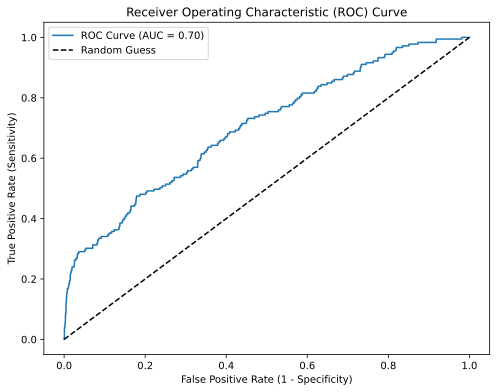

In [53]:
# Plot ROC curve
plot_roc_curve(best_xgboost_model, X_test[selected_features], y_test)

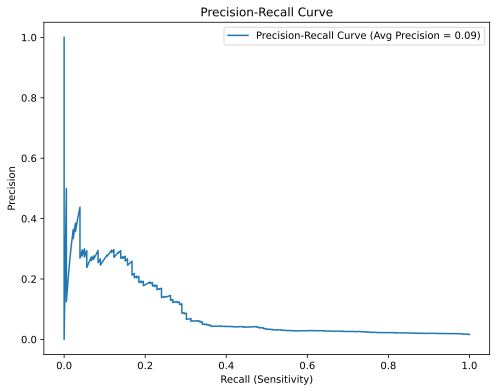

In [54]:
# Plot precision-recall curve
plot_precision_recall_curve(best_xgboost_model, X_test[selected_features], y_test)

[[0.9662608 0.0337392]
 [0.7150838 0.2849162]]


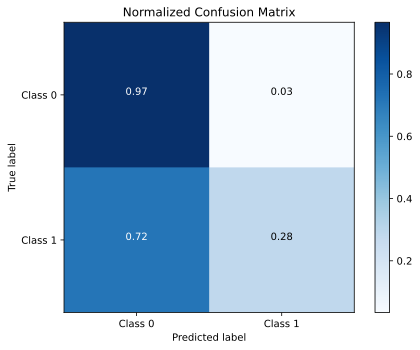

In [55]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1'], normalize=True, title='Normalized Confusion Matrix')

In [56]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10759
           1       0.12      0.28      0.17       179

    accuracy                           0.96     10938
   macro avg       0.56      0.63      0.57     10938
weighted avg       0.97      0.96      0.96     10938

